# Evaluating Specificity with WordNet Hierarchies

In [2]:
# load cleaned responses from the data folder for kamala kamala_responses_cleaned.txt
with open('../data/kamala_responses_cleaned.txt', 'r') as file:
    CLN_kamala_responses = file.read()

# load cleaned responses from the data folder for trump_responses_cleaned.txt
with open('../data/trump_responses_cleaned.txt', 'r') as file:
    CLN_trump_responses = file.read()

# For CLN_kamala_responses and CLN_trump_responses break
# the responses at the \n character to get individual sentences

CLN_kamala_sentences = CLN_kamala_responses.split("\n")
CLN_trump_sentences = CLN_trump_responses.split("\n")

In [3]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')

# Function to get word specificity using first synset and filtering content words only
def get_word_specificity(word):
    synsets = wn.synsets(word)
    if not synsets:
        return None  # Exclude word if not found in WordNet
    return synsets[0].max_depth()  # Use the first synset for disambiguation

# Function to check if a word is a content word (noun, verb, adj, adv)
def is_content_word(word, pos_tag):
    content_pos_tags = ['NN', 'VB', 'JJ', 'RB']  # Nouns, verbs, adjectives, adverbs
    return pos_tag in content_pos_tags

# Process each response: tokenization, POS tagging, and filtering content words
def calculate_specificity_for_responses(responses):
    stop_words = set(stopwords.words('english'))
    response_specificity = {}

    for response in responses:
        tokens = word_tokenize(response)
        tagged_tokens = pos_tag(tokens)
        specificities = []

        for word, pos in tagged_tokens:
            word_lower = word.lower()
            if word_lower not in stop_words and is_content_word(word_lower, pos):
                specificity = get_word_specificity(word_lower)
                if specificity is not None:  # Exclude words not found in WordNet
                    specificities.append(specificity)
        
        response_specificity[response] = specificities

    return response_specificity

# Function to calculate the average specificity of each response
def calculate_average_specificity(responses):
    return {response: (sum(specificities) / len(specificities)) if specificities else 0 
            for response, specificities in responses.items()}

# Calculate specificity for Trump's and Harris' responses
trumps_specificity = calculate_specificity_for_responses(CLN_trump_sentences)
harris_specificity = calculate_specificity_for_responses(CLN_kamala_sentences)

# Calculate the average specificity for Trump's and Harris' responses
trumps_avg_specificity = calculate_average_specificity(trumps_specificity)
harris_avg_specificity = calculate_average_specificity(harris_specificity)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /mounts/Users/cisintern/pwicke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


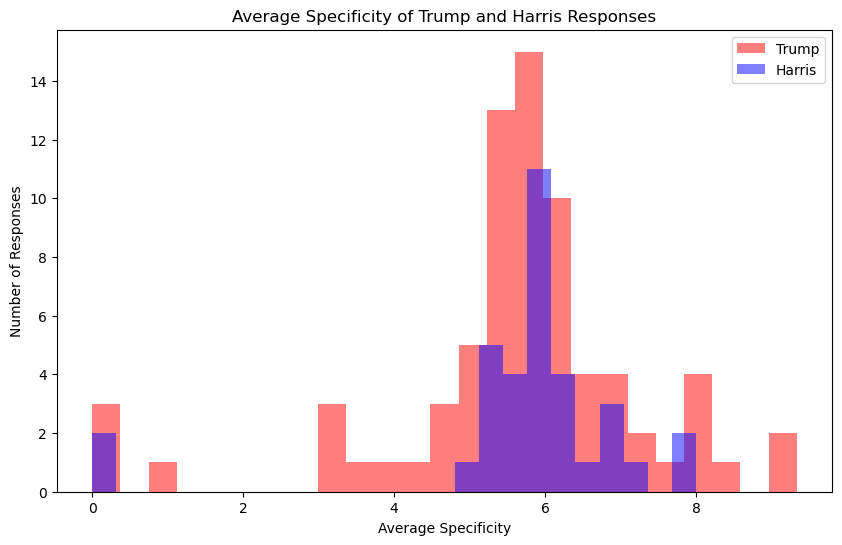

In [7]:
# Plot the average specificity of Trump's and Harris' responses
# Use red color for Trump and blue color for Harris
# Make the plot look nice by adding labels, title, and legend

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(trumps_avg_specificity.values(), bins=25, color='red', alpha=0.5, label='Trump')
plt.hist(harris_avg_specificity.values(), bins=25, color='blue', alpha=0.5, label='Harris')
plt.xlabel('Average Specificity')
plt.ylabel('Number of Responses')
plt.title('Average Specificity of Trump and Harris Responses')
plt.legend()
plt.show()
